Loaeza Septavial 1103204003

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
# Tentukan path file dataset di Google Drive
path = '/content/Mall_Customers.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(path)

# Tampilkan beberapa baris pertama dari dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Mengganti nama atribut dalam dataframe
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

# inplace=True digunakan untuk mengubah dataframe yang ada tanpa perlu membuat dataframe baru

# Tampilkan dataframe setelah mengubah nama atribut
print(df)

     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [4]:
# Menghapus kolom 'CustomerID' dan 'Gender' dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)

# axis=1 menunjukkan bahwa Anda ingin menghapus kolom, bukan baris

# Tampilkan dataframe setelah menghapus kolom
print(df)

     Age  Annual Income  Spending Score
0     19             15              39
1     21             15              81
2     20             16               6
3     23             16              77
4     31             17              40
..   ...            ...             ...
195   35            120              79
196   45            126              28
197   32            126              74
198   32            137              18
199   30            137              83

[200 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

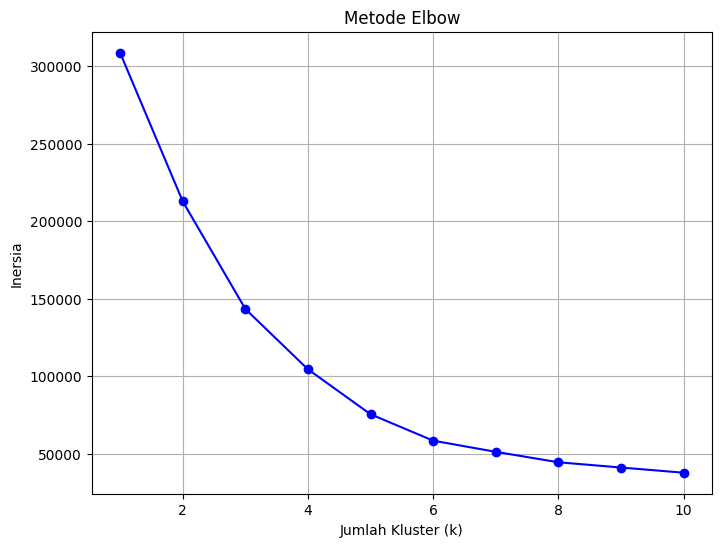

In [5]:
# Pilih atribut yang akan digunakan untuk klasterisasi
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar untuk menyimpan nilai inersia (inertia) kluster
inertia = []

# Iterasi untuk jumlah kluster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inersia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


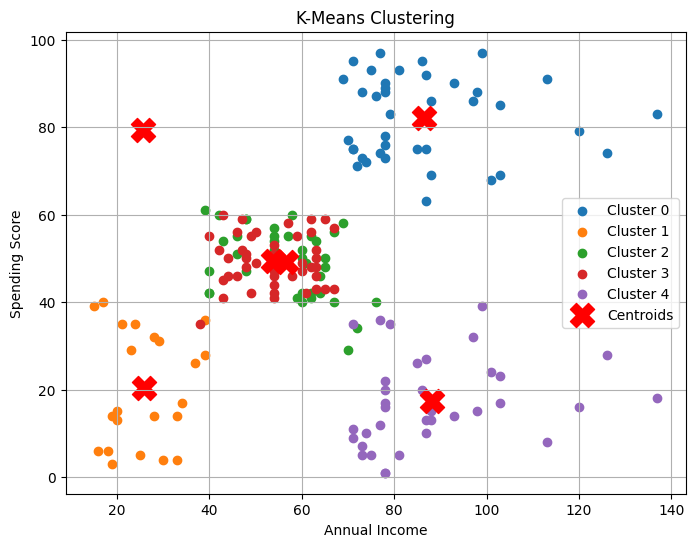

In [6]:
# Inisialisasi model K-Means dengan 6 kluster
kmeans = KMeans(n_clusters=6)

# Melakukan klasterisasi
df['label'] = kmeans.fit_predict(data)

# Visualisasikan berdasarkan label
plt.figure(figsize=(8, 6))

# Plot kluster
for label in range(5):
    plt.scatter(data[df['label'] == label]['Annual Income'],
                data[df['label'] == label]['Spending Score'],
                label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Inisialisasi daftar untuk menyimpan nilai silhouette score
silhouette_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan nilai silhouette score
for k, score in enumerate(silhouette_scores, start=2):
    print(f'Silhouette Score untuk k={k}: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score untuk k=2: 0.293166070535953
Silhouette Score untuk k=3: 0.3839349967742105
Silhouette Score untuk k=4: 0.40546302077733304
Silhouette Score untuk k=5: 0.44428597560893024
Silhouette Score untuk k=6: 0.4523443947724053
Silhouette Score untuk k=7: 0.4412807576186172
Silhouette Score untuk k=8: 0.4280971079746162
Silhouette Score untuk k=9: 0.40126260157691634
Silhouette Score untuk k=10: 0.3790978814868016


In [8]:
# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index score
davies_bouldin_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    db_score = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(db_score)

# Menampilkan nilai Davies-Bouldin Index score
for k, score in enumerate(davies_bouldin_scores, start=2):
    print(f'Davies-Bouldin Index Score untuk k={k}: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index Score untuk k=2: 1.3571023143309133
Davies-Bouldin Index Score untuk k=3: 0.8748062648492879
Davies-Bouldin Index Score untuk k=4: 0.8914904209843165
Davies-Bouldin Index Score untuk k=5: 0.8218781633199781
Davies-Bouldin Index Score untuk k=6: 0.746974007275528
Davies-Bouldin Index Score untuk k=7: 0.7863764854525301
Davies-Bouldin Index Score untuk k=8: 0.8641438876447516
Davies-Bouldin Index Score untuk k=9: 0.9070119449899816
Davies-Bouldin Index Score untuk k=10: 0.9573604236246045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index score
calinski_harabasz_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch_score = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(ch_score)

# Menampilkan nilai Calinski-Harabasz Index score
for k, score in enumerate(calinski_harabasz_scores, start=2):
    print(f'Calinski-Harabasz Index Score untuk k={k}: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index Score untuk k=2: 89.28096999467428
Calinski-Harabasz Index Score untuk k=3: 113.70507138642179
Calinski-Harabasz Index Score untuk k=4: 127.9838294818919
Calinski-Harabasz Index Score untuk k=5: 151.04386000160667
Calinski-Harabasz Index Score untuk k=6: 166.7204931788687
Calinski-Harabasz Index Score untuk k=7: 162.2852042279988
Calinski-Harabasz Index Score untuk k=8: 163.58062876554533
Calinski-Harabasz Index Score untuk k=9: 156.15508760692356
Calinski-Harabasz Index Score untuk k=10: 152.26426170758603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
